In [1]:
# Colab 한글 깨짐 해결 위한 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (23.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123105 files and dir

In [1]:
# matplotlib 설정
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Ada Boost

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   test_size = 0.3,
                                                   shuffle = True)

In [3]:
model_ada = AdaBoostClassifier(n_estimators=9, algorithm='SAMME.R',
                              learning_rate=0.5).fit(X_train, y_train)

#### 에이다 부스트의 파라미터
  - base_estimator : 모델을 정해주는 파라미터이다. 값을 지정해주지 않으면 기본값으로 DecisionTreeClassifier(max_depth=1)로 설정된다.
  - learning_rate : 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 설정한다. 클수록 보정을 강하게 한다, 기본값은 1.0

- algorithm : 사이킷런에서 제공하는 에이다 부스트는 SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function)이라는 알고리즘으로 구현되어 있다. 기본값은 SAMME.R(R은 Real) 이다.
  - SAMME는 AdaBoost와 알고리즘은 유사하다. 다만 n번째 모델의 가중치를 구하는 부분만 AdaBoost와 다른 수식을 가진다. 만약 클래스의 수가 2인 이진 분류의 경우에는 SAMME는 AdaBoost와 동일한 알고리즘이 된다.
  - SAMME.R은 모델의 예측값을 이용하는게 아니라 클래스의 확률을 기반으로 한다.

In [4]:
model_ada.estimators_

[DecisionTreeClassifier(max_depth=1, random_state=1737733901),
 DecisionTreeClassifier(max_depth=1, random_state=2139541294),
 DecisionTreeClassifier(max_depth=1, random_state=452507901),
 DecisionTreeClassifier(max_depth=1, random_state=1841918975),
 DecisionTreeClassifier(max_depth=1, random_state=540721013),
 DecisionTreeClassifier(max_depth=1, random_state=1930966967),
 DecisionTreeClassifier(max_depth=1, random_state=990923231),
 DecisionTreeClassifier(max_depth=1, random_state=1775332241),
 DecisionTreeClassifier(max_depth=1, random_state=1831113727)]

- 랜덤 포레스트와 같이 에이다 부스트의 예측기들은 estimators_에 저장된다.

In [5]:
def draw_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5) # 클래스 0에 해당하는 X값 표시
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5) # 클래스 1에 해당하는 X값 표시
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", alpha=0.5) # 클래스 2에 해당하는 X값 표시
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

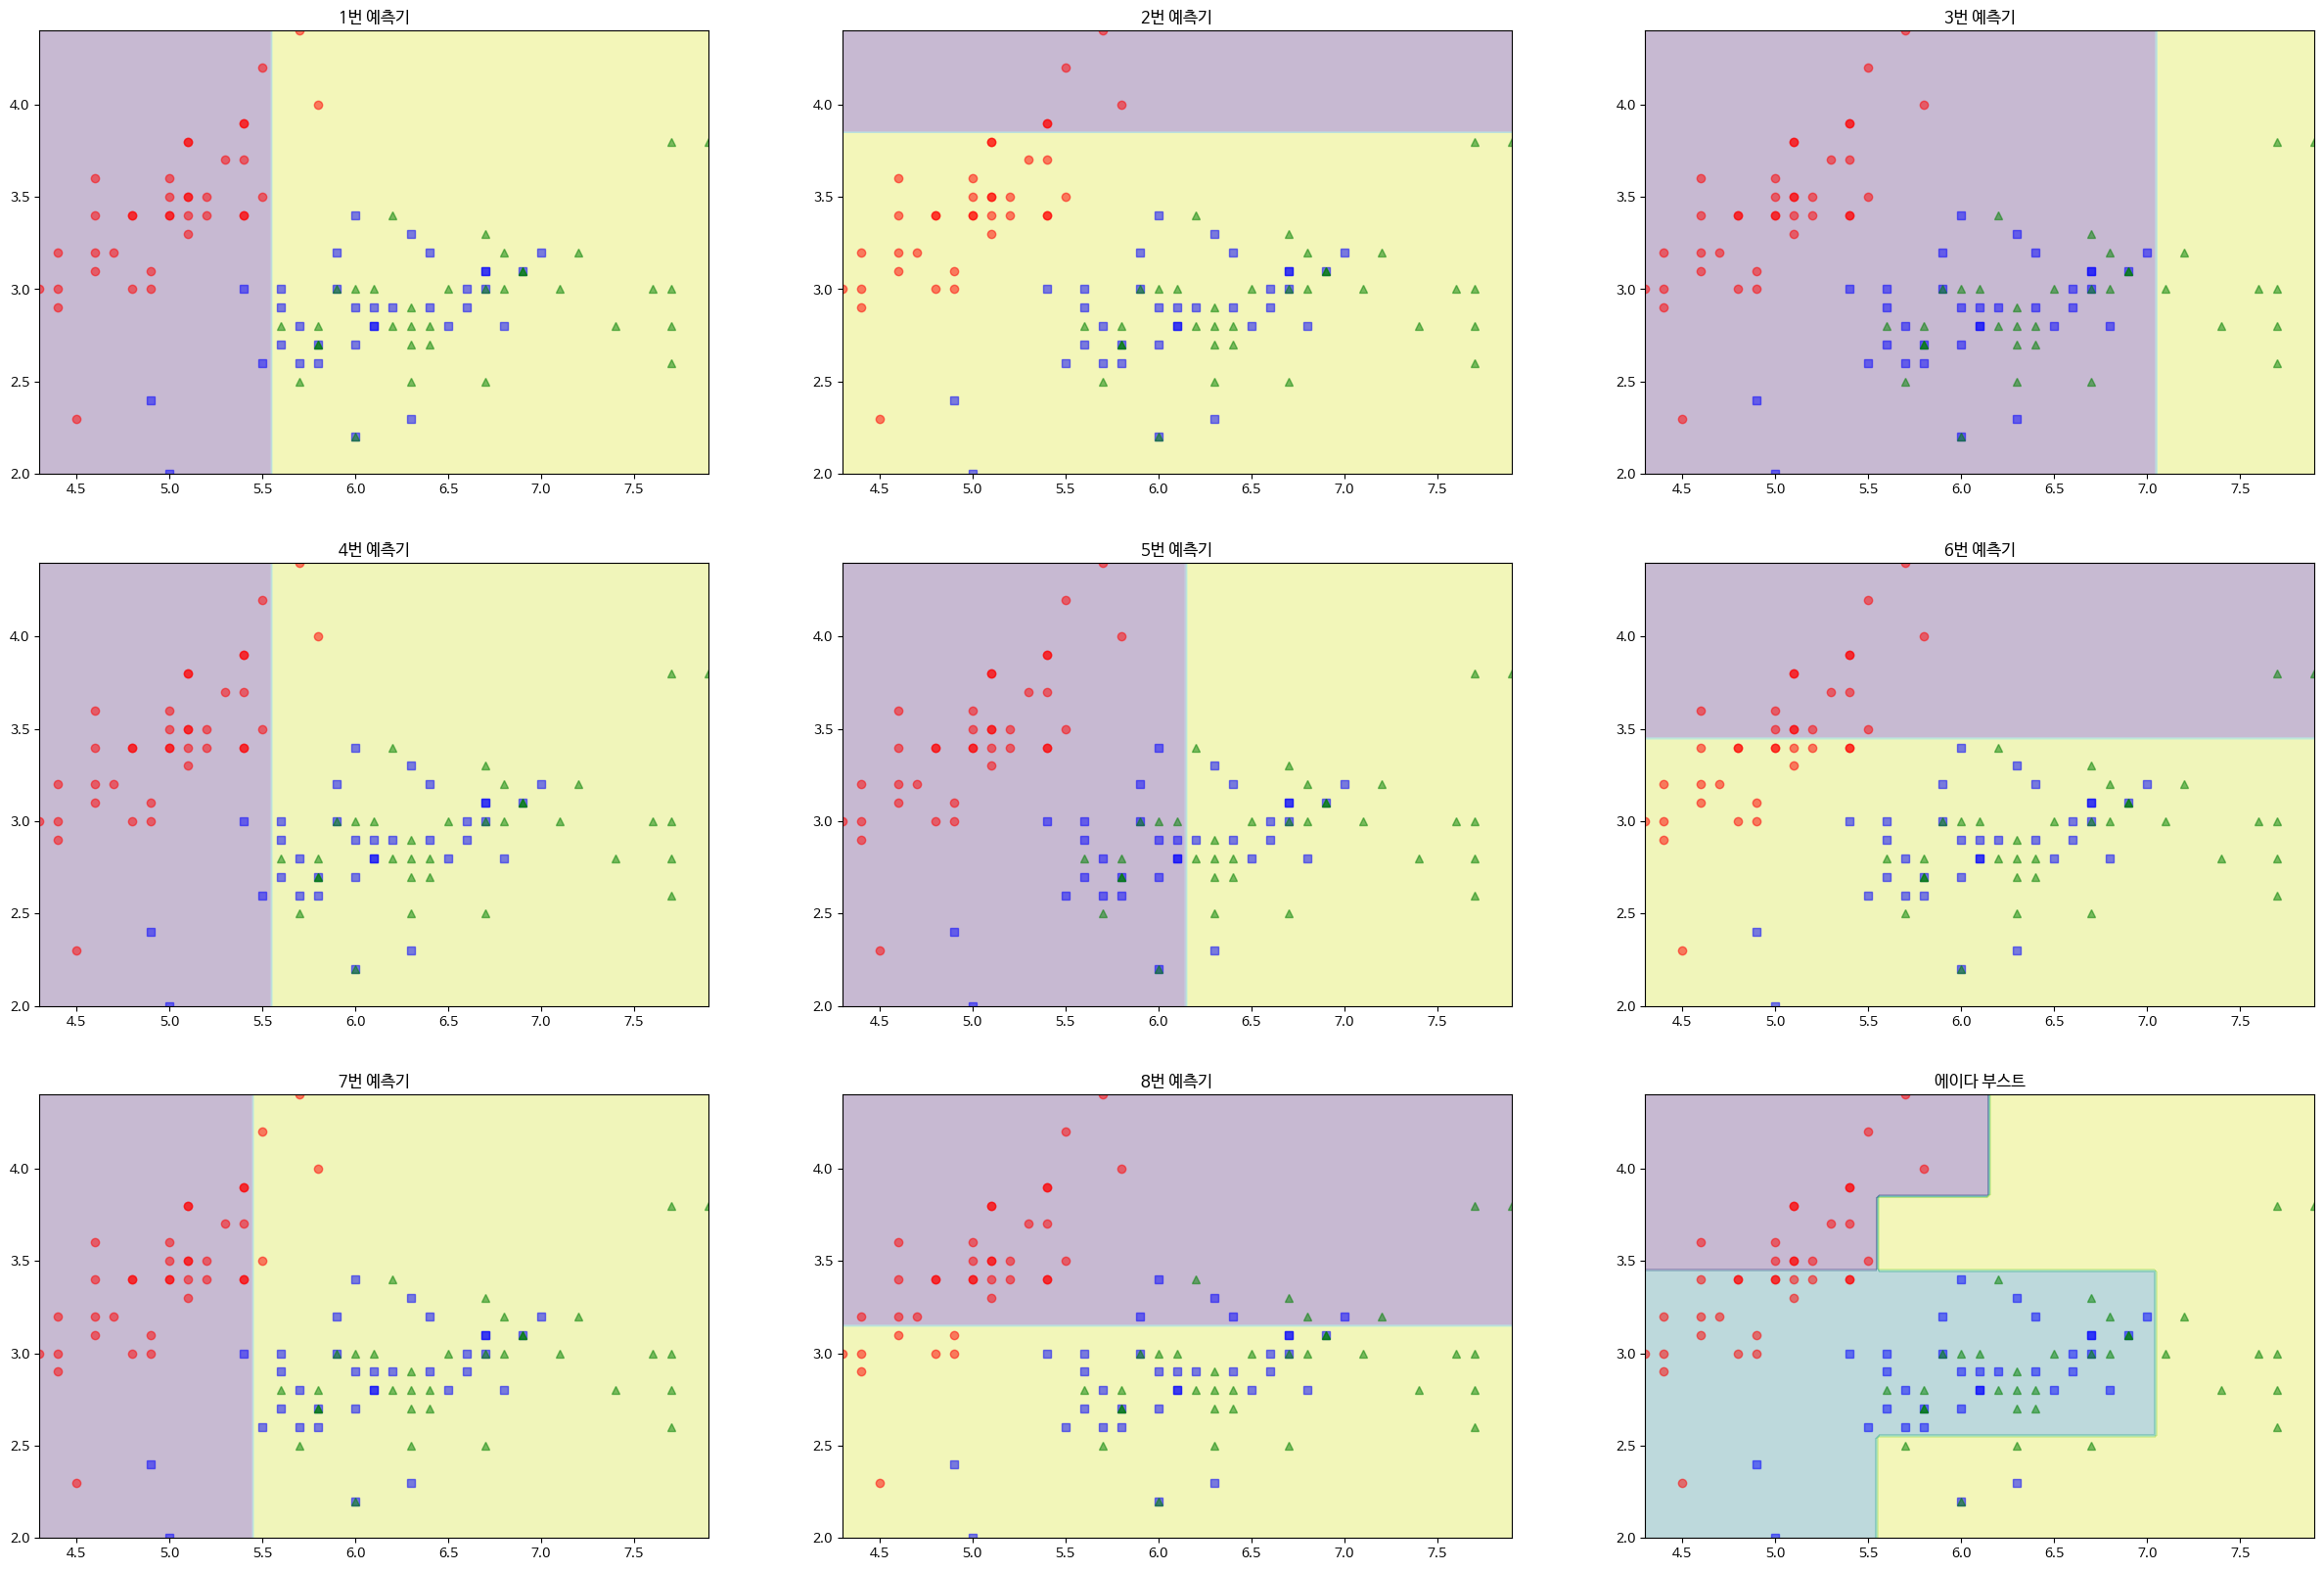

In [6]:
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(model_ada.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(model_ada.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(model_ada.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(model_ada.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(model_ada.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(model_ada.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(model_ada.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(model_ada.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(model_ada, X_train, y_train)

- 에이다 부스트는 깊이가 1인 결정트리를 사용한다. 깊이가 1이기 때문에 경계선이 하나만 표시 되어있다. 앙상블된 모델역시 경계선이 단순하게 그려져있다.

In [11]:
np.argmax(model_ada.predict_proba(X_test),axis=1)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2])

- algorithm이 SAMME.R인 경우에는 predict_proba를 이용해 각 클래스의 확률을 알 수 있다.

In [9]:
model_ada.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2])

- 예측 결과와 클래스의 확률을 비교해보자.

In [12]:
print('SAMME.R의 train score : {}'.format(model_ada.score(X_train, y_train)))
print('SAMME.R의 test score : {}'.format(model_ada.score(X_test, y_test)))

SAMME.R의 train score : 0.580952380952381
SAMME.R의 test score : 0.4666666666666667


In [13]:
ada_samme = AdaBoostClassifier(n_estimators=9, algorithm='SAMME',
                              learning_rate=0.5).fit(X_train, y_train)

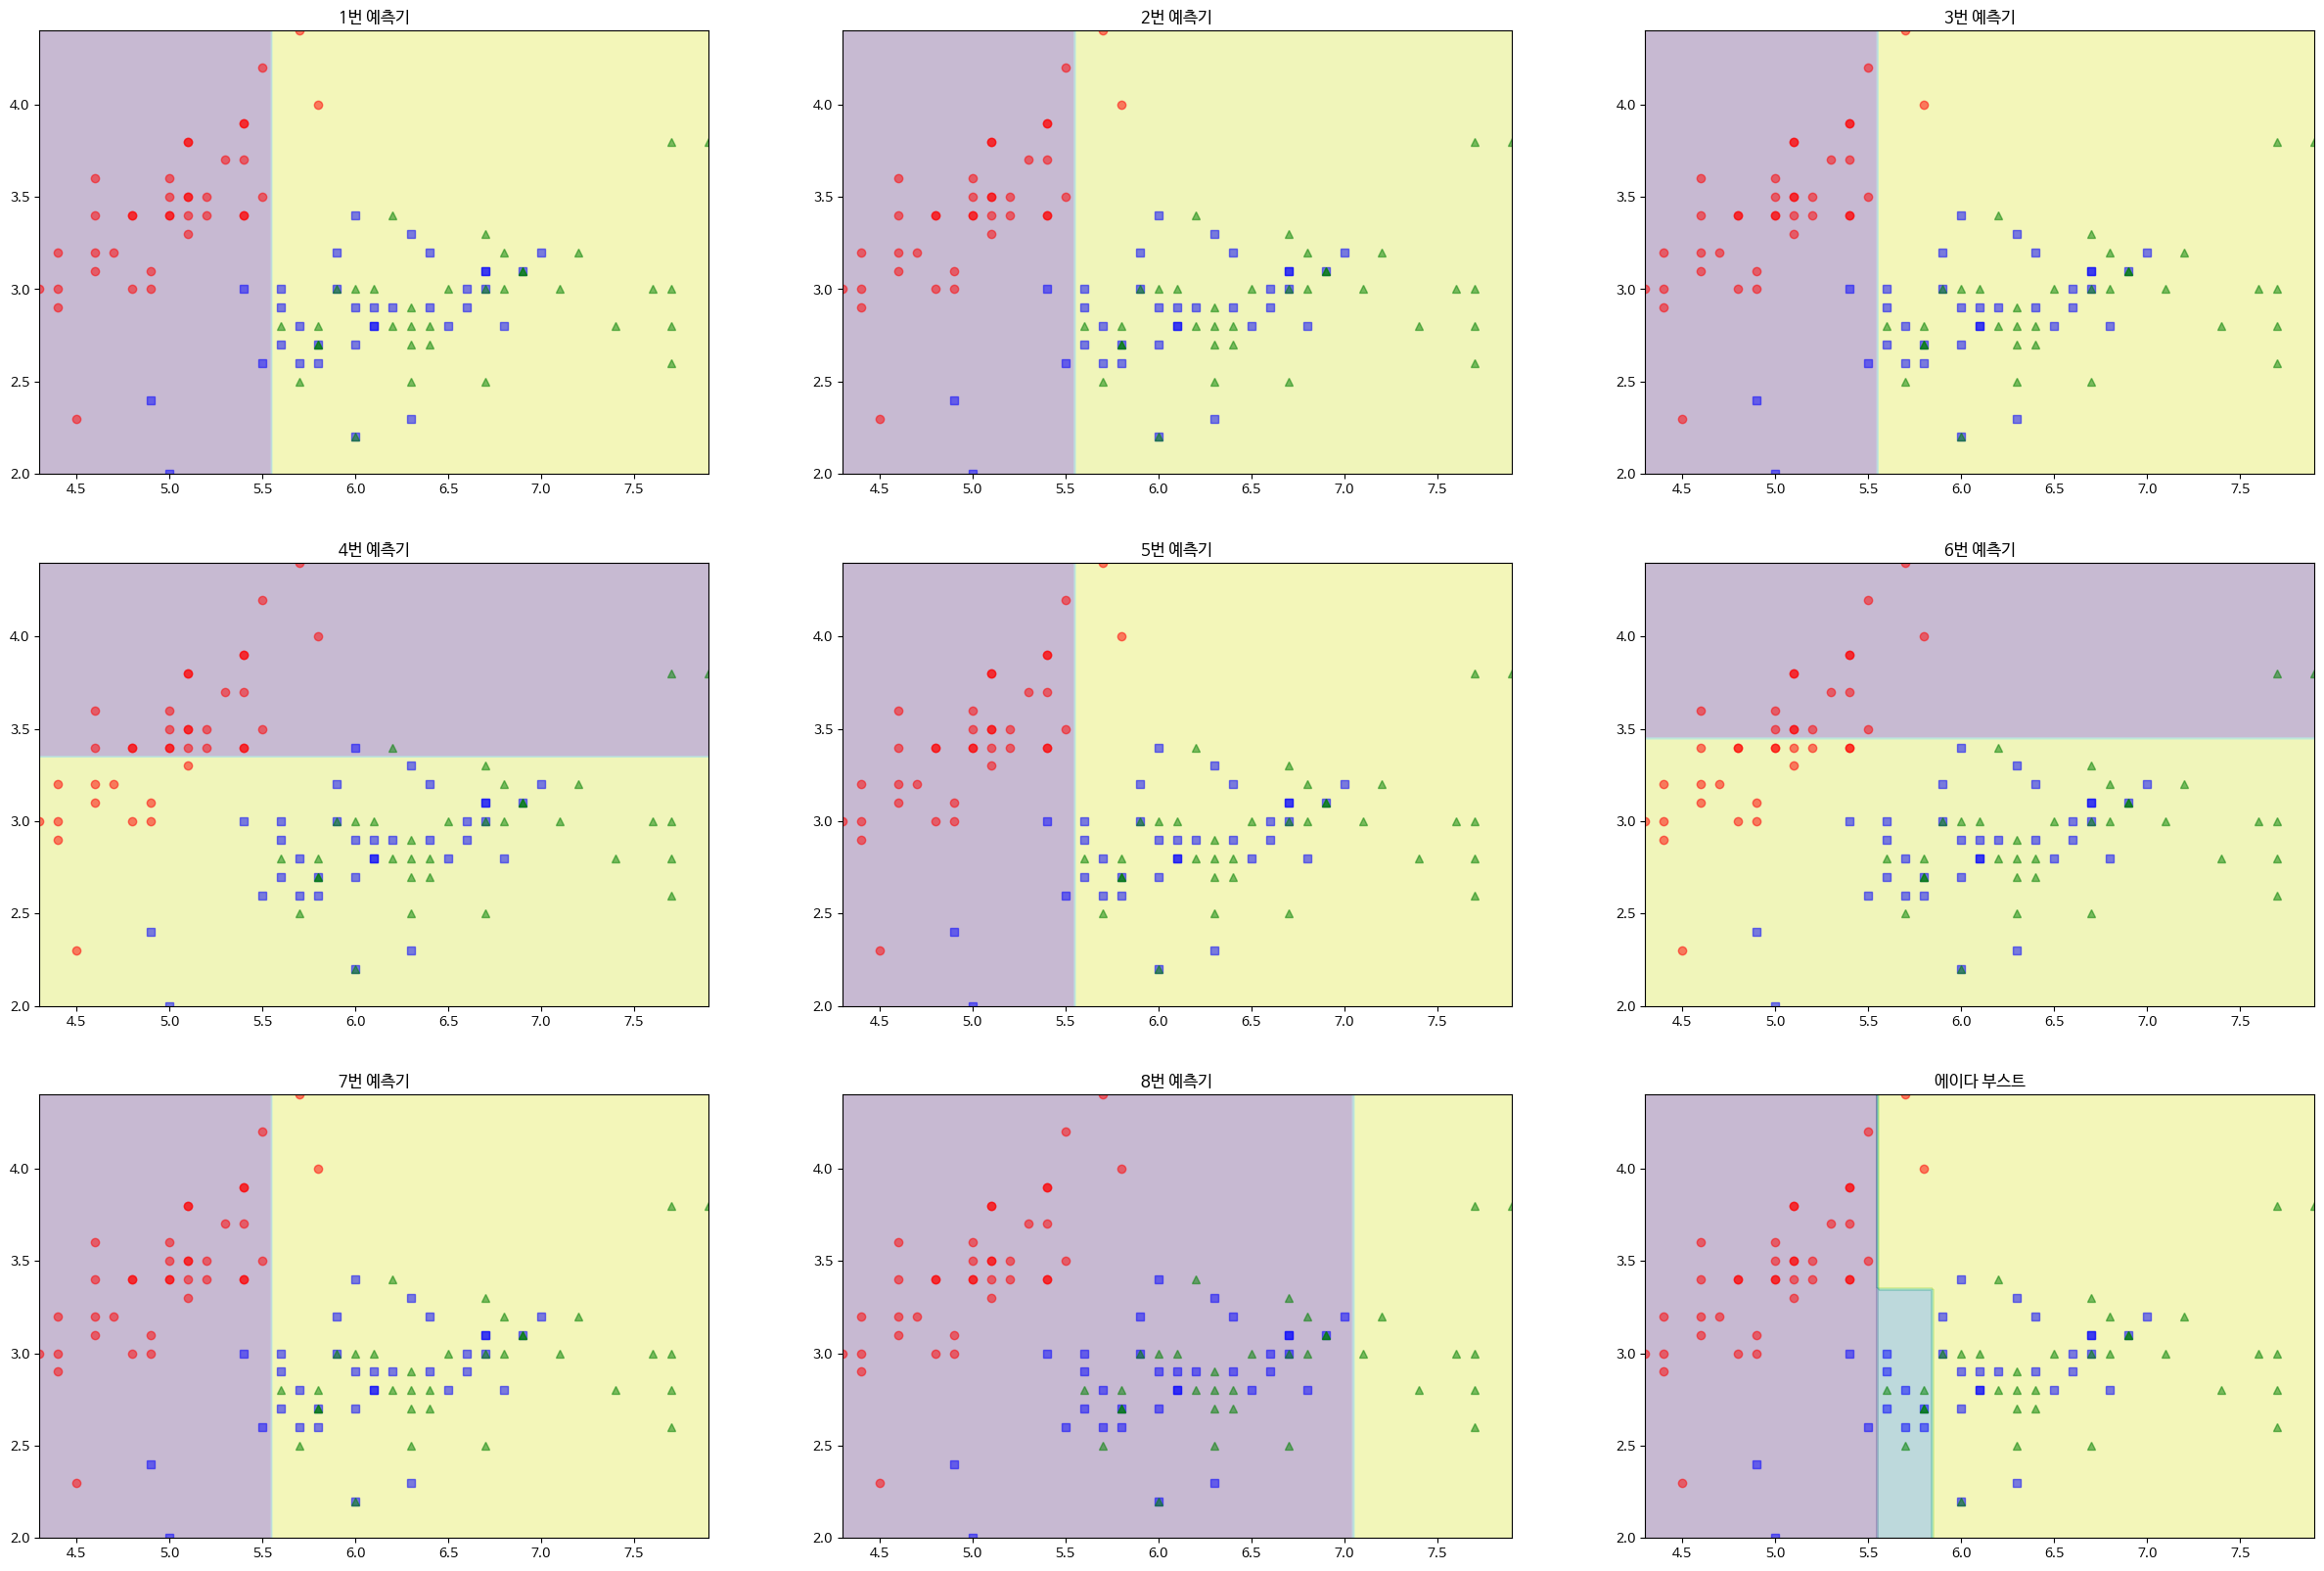

In [14]:
plt.figure(figsize = (30, 20))

plt.subplot(3,3,1)
plt.title("1번 예측기")
draw_border(ada_samme.estimators_[0], X_train, y_train)

plt.subplot(3,3,2)
plt.title("2번 예측기")
draw_border(ada_samme.estimators_[1], X_train, y_train)

plt.subplot(3,3,3)
plt.title("3번 예측기")
draw_border(ada_samme.estimators_[2], X_train, y_train)

plt.subplot(3,3,4)
plt.title("4번 예측기")
draw_border(ada_samme.estimators_[3], X_train, y_train)

plt.subplot(3,3,5)
plt.title("5번 예측기")
draw_border(ada_samme.estimators_[4], X_train, y_train)

plt.subplot(3,3,6)
plt.title("6번 예측기")
draw_border(ada_samme.estimators_[5], X_train, y_train)

plt.subplot(3,3,7)
plt.title("7번 예측기")
draw_border(ada_samme.estimators_[6], X_train, y_train)

plt.subplot(3,3,8)
plt.title("8번 예측기")
draw_border(ada_samme.estimators_[7], X_train, y_train)

plt.subplot(3,3,9)
plt.title("에이다 부스트")
draw_border(ada_samme, X_train, y_train)

In [15]:
print('SAMME의 train score : {}'.format(ada_samme.score(X_train, y_train)))
print('SAMME의 test score : {}'.format(ada_samme.score(X_test, y_test)))

SAMME의 train score : 0.6761904761904762
SAMME의 test score : 0.7333333333333333


In [16]:
ada_samme.predict_proba(X_test)

array([[0.29381089, 0.35830693, 0.34788217],
       [0.38847693, 0.33188205, 0.27964102],
       [0.28025963, 0.35722876, 0.36251161],
       [0.38847693, 0.33188205, 0.27964102],
       [0.38847693, 0.33188205, 0.27964102],
       [0.28025963, 0.35722876, 0.36251161],
       [0.38847693, 0.33188205, 0.27964102],
       [0.43196504, 0.29162095, 0.276414  ],
       [0.43196504, 0.29162095, 0.276414  ],
       [0.29381089, 0.35830693, 0.34788217],
       [0.38847693, 0.33188205, 0.27964102],
       [0.29381089, 0.35830693, 0.34788217],
       [0.29381089, 0.35830693, 0.34788217],
       [0.30009726, 0.33606318, 0.36383956],
       [0.28025963, 0.35722876, 0.36251161],
       [0.43196504, 0.29162095, 0.276414  ],
       [0.38847693, 0.33188205, 0.27964102],
       [0.38847693, 0.33188205, 0.27964102],
       [0.33153893, 0.3195019 , 0.34895917],
       [0.27989144, 0.33815578, 0.38195278],
       [0.38847693, 0.33188205, 0.27964102],
       [0.38847693, 0.33188205, 0.27964102],
       [0.

- SAMME보다는 SAMME.R을 이용한 에이다부스트 모델이 성능이 더 높게 나오는 것을 확인할 수 있다.

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size = 0.2,
                                                   shuffle = True)

randf = RandomForestClassifier(n_estimators=50, random_state=42).fit(X_train, y_train)

ada = AdaBoostClassifier(n_estimators=50, learning_rate=0.5).fit(X_train, y_train)

In [18]:
randf.feature_importances_

array([0.05599936, 0.00821226, 0.08443708, 0.01947481, 0.00604798,
       0.02044911, 0.09755272, 0.08925961, 0.00331366, 0.00555133,
       0.02361678, 0.00395885, 0.01771952, 0.03907989, 0.00359267,
       0.00384619, 0.00750396, 0.00366094, 0.00245127, 0.00524087,
       0.06051271, 0.02167305, 0.08878801, 0.08571673, 0.00517599,
       0.02029393, 0.05397922, 0.14812146, 0.01020566, 0.0045644 ])

In [19]:
ada.feature_importances_

array([0.  , 0.1 , 0.  , 0.04, 0.06, 0.06, 0.  , 0.08, 0.02, 0.  , 0.  ,
       0.  , 0.02, 0.12, 0.  , 0.04, 0.  , 0.  , 0.02, 0.02, 0.  , 0.06,
       0.1 , 0.02, 0.06, 0.  , 0.08, 0.06, 0.04, 0.  ])

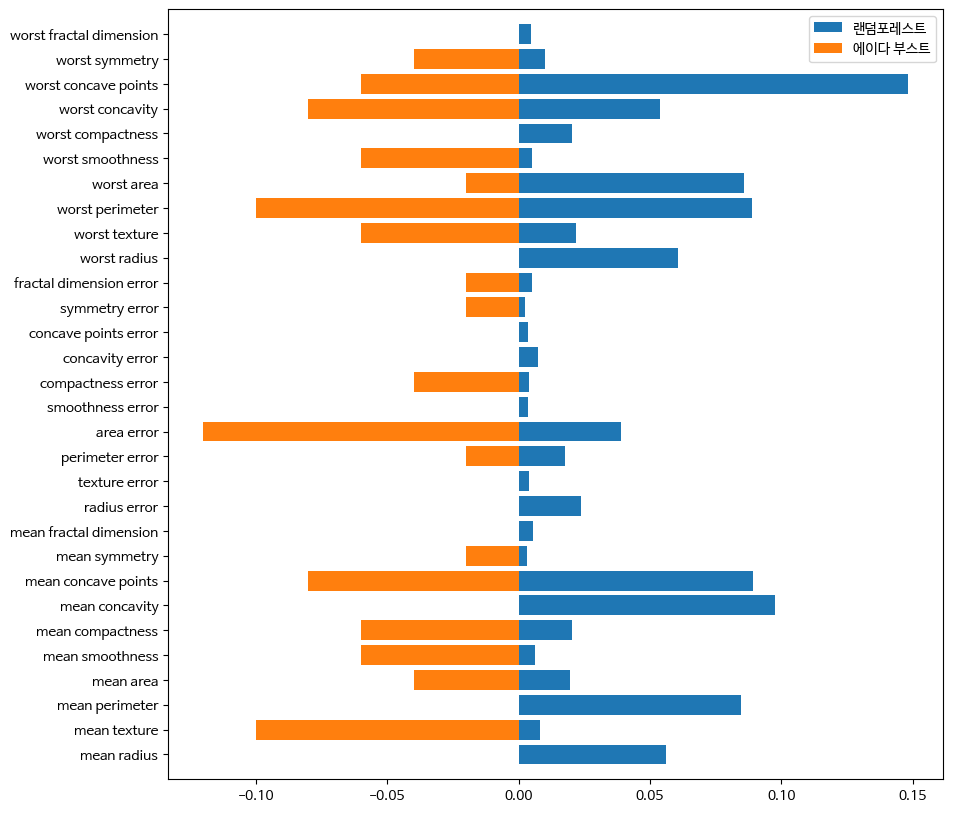

In [20]:
plt.figure(figsize = (10,10))
X = np.arange(cancer.data.shape[1])
Y1 = randf.feature_importances_
Y2 = ada.feature_importances_
plt.barh(X, Y1)
plt.barh(X, -Y2)
plt.yticks(X, cancer.feature_names)
plt.ylim(-1, cancer.data.shape[1])
plt.legend(['랜덤포레스트', '에이다 부스트'])
plt.show()

- 에이다 부스트와 랜덤포레스트의 특성 중요도를 비교해 보았다.
- 0의 값을 가진 특성들도 있고 다른 모델에서는 중요하게 생각하지 않은 특성을 오히려 중요하게 보는 경우도 있다.